# Convolution Neural Network 
## Ashutosh Raichurkar 001306059

## In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They have applications in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing, and financial time series.Understanding deep learning is the objective of the assignment

In [9]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://cdn-images-1.medium.com/fit/t/1600/480/1*vkQ0hXDaQv57sALXAJquxA.jpeg")

In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator

#Deep Learning Libraries
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

#CNN
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
import tensorflow as tf
import random as rn

#
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from keras.models import Sequential
from keras import models, layers
import keras

In [20]:
path = 'C://Ashutosh//Boston//Northeastern_University//Advance_Data_Science and Architechture//Assignment_3//leapGestRecog//00//01_palm//frame_00_01_0001.png'
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
print(img.shape)

(240, 640)


In [23]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('C://Ashutosh//Boston//Northeastern_University//Advance_Data_Science and Architechture//Assignment_3//leapGestRecog//00'):
    if not j.startswith('.'):
                              
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [24]:
x_data = []
y_data = []
IMG_SIZE = 150
datacount = 0 
for i in range(0, 10):
    for j in os.listdir('C://Ashutosh//Boston//Northeastern_University//Advance_Data_Science and Architechture//Assignment_3//leapGestRecog//0' + str(i) + '//'):
        if not j.startswith('.'):
            count = 0 
            for k in os.listdir('C://Ashutosh//Boston//Northeastern_University//Advance_Data_Science and Architechture//Assignment_3//leapGestRecog//0' + 
                                str(i) + '//' + j + '//'):
                                
                path = 'C://Ashutosh//Boston//Northeastern_University//Advance_Data_Science and Architechture//Assignment_3//leapGestRecog//0' + str(i) + '//' + j + '//' + k
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
print(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[2]
  [2]
  [2]
  ...
  [2]
  [2]
  [2]]

 ...

 [[7]
  [7]
  [7]
  ...
  [7]
  [7]
  [7]]

 [[8]
  [8]
  [8]
  ...
  [8]
  [8]
  [8]]

 [[9]
  [9]
  [9]
  ...
  [9]
  [9]
  [9]]]


In [25]:
y_data = y_data.reshape(datacount, 1)
print(y_data)

[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]


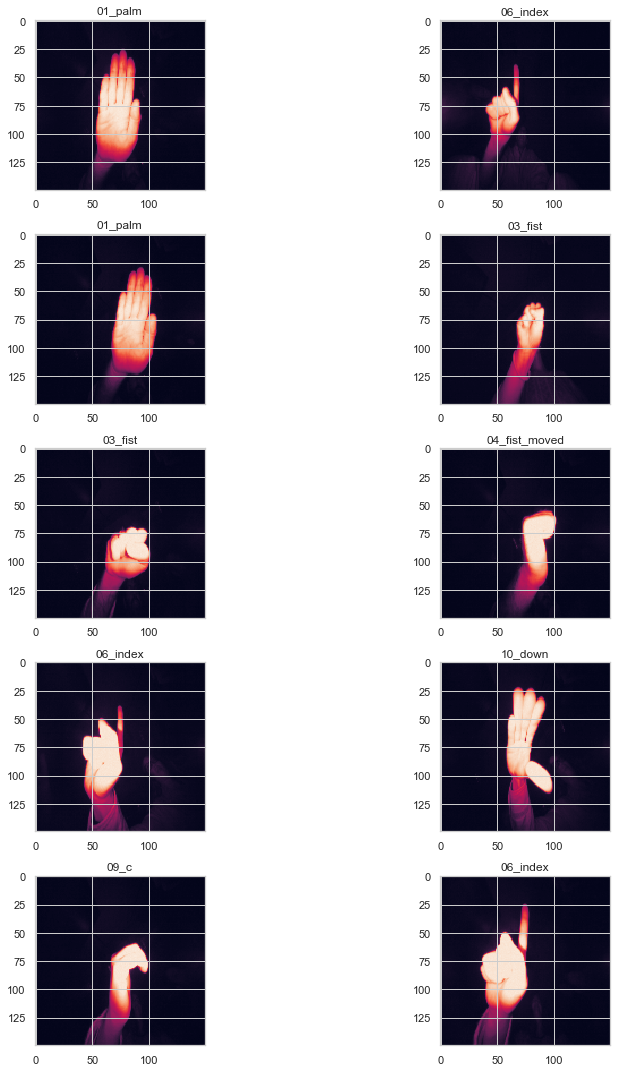

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title(reverselookup[y_data[l,0]])
        
plt.tight_layout()

In [12]:
y_data=to_categorical(y_data)
x_data = x_data.reshape((datacount, IMG_SIZE, IMG_SIZE, 1))
x_data = x_data/255

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=42)

In [2]:
# Activation Function = Relu,Padding = Same, epoch= 5 , Hidden Layers = 10, Layers = 4

## Part A: CNN Model

In [34]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [10]:
batch_size=512
epochs=5

In [11]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)        83040     
__________

In [20]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [14]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2,callbacks=callbacks)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 12000 samples, validate on 3000 samples







Epoch 1/5
12000/12000 [==============================] - ETA: 9:17 - loss: 2.3029 - acc: 0.070 - ETA: 8:20 - loss: 2.2797 - acc: 0.103 - ETA: 7:57 - loss: 2.2536 - acc: 0.117 - ETA: 7:29 - loss: 2.1964 - acc: 0.164 - ETA: 7:00 - loss: 2.1528 - acc: 0.184 - ETA: 6:33 - loss: 2.1230 - acc: 0.201 - ETA: 6:10 - loss: 2.0847 - acc: 0.247 - ETA: 5:49 - loss: 2.0676 - acc: 0.263 - ETA: 5:26 - loss: 2.0132 - acc: 0.288 - ETA: 5:04 - loss: 1.9586 - acc: 0.308 - ETA: 4:42 - loss: 1.9206 - acc: 0.321 - ETA: 4:19 - loss: 1.8748 - acc: 0.343 - ETA: 3:56 - loss: 1.8196 - acc: 0.367 - ETA: 3:34 - loss: 1.7603 - acc: 0.392 - ETA: 3:11 - loss: 1.7118 - acc: 0.411 - ETA: 2:49 - loss: 1.6674 - acc: 0.426 - ETA: 2:26 - loss: 1.6155 - acc: 0.442 - ETA: 2:03 - loss: 1.5682 - acc: 0.459 - ETA: 1:41 - loss: 1.5243 - acc: 0.476 - ETA: 1:18 - loss: 1.4770 - acc

In [15]:
score= model.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 42 - ETA: 42 - ETA: 41 - ETA: 41 - ETA: 40 - ETA: 40 - ETA: 39 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 29 - ETA:

In [16]:
print(score)

[0.002798117813351564, 0.9994]


In [13]:
# We get accurracy of 99% for this model(ie Activation = Relu)

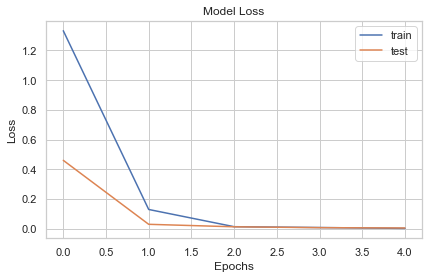

In [17]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

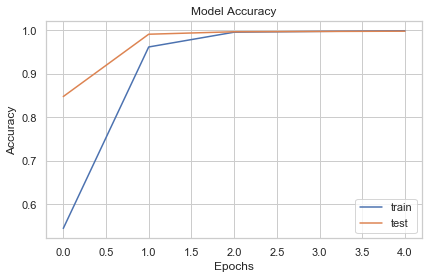

In [18]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Part B: Implementing Tanh function

In [75]:
model2 = Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='tanh', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='tanh'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model2.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='tanh'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='tanh'))

model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(10, activation = "softmax"))

In [76]:
model2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [77]:
batch_size=1000
epochs=5

In [33]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 150, 150, 32)      832       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 18, 18, 96)        83040     
__________

In [78]:
History = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2,callbacks=callbacks)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
12000/12000 [==============================] - ETA: 16:59 - loss: 2.3011 - acc: 0.11 - ETA: 16:48 - loss: 2.2543 - acc: 0.11 - ETA: 15:36 - loss: 2.2044 - acc: 0.15 - ETA: 15:39 - loss: 2.1177 - acc: 0.21 - ETA: 13:38 - loss: 2.0154 - acc: 0.28 - ETA: 11:43 - loss: 1.9459 - acc: 0.31 - ETA: 9:32 - loss: 1.8876 - acc: 0.3466 - ETA: 7:21 - loss: 1.8466 - acc: 0.365 - ETA: 5:22 - loss: 1.7722 - acc: 0.395 - ETA: 3:29 - loss: 1.7063 - acc: 0.425 - ETA: 1:42 - loss: 1.6524 - acc: 0.444 - 1317s 110ms/step - loss: 1.5899 - acc: 0.4701 - val_loss: 0.7401 - val_acc: 0.8217

Epoch 00001: val_loss did not improve from 0.00811
Epoch 2/5
12000/12000 [==============================] - ETA: 20:02 - loss: 0.7073 - acc: 0.83 - ETA: 15:22 - loss: 0.7063 - acc: 0.81 - ETA: 14:22 - loss: 0.6740 - acc: 0.81 - ETA: 14:29 - loss: 0.6282 - acc: 0.82 - ETA: 12:40 - loss: 0.5833 - acc: 0.83 - ETA: 11:45 - loss: 0.5405 - acc: 0.84 - ETA: 9:45 - loss: 0.5

In [79]:
score= model2.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 

In [4]:
# After Changing the Activation function, we get accuracy almost as Relu, but the time to run the model averages to 16 mins per epoch

In [80]:
print(score)

[0.003099877402652055, 0.9996]


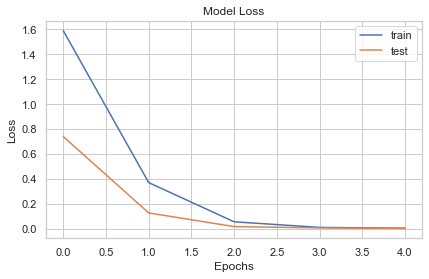

In [81]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

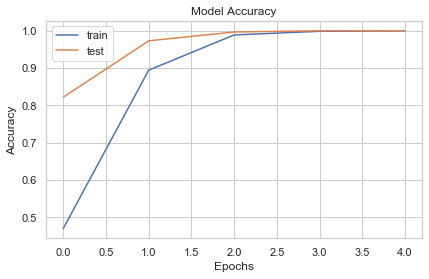

In [82]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Part E: Changing the optimizer to RMS Prop

In [18]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

In [21]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,  validation_split=0.2,callbacks=callbacks)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 12000 samples, validate on 3000 samples







Epoch 1/5
12000/12000 [==============================] - ETA: 3:21 - loss: 2.3014 - acc: 0.127 - ETA: 2:51 - loss: 2.2869 - acc: 0.139 - ETA: 2:24 - loss: 2.2702 - acc: 0.190 - ETA: 2:05 - loss: 2.2534 - acc: 0.202 - ETA: 1:47 - loss: 2.2341 - acc: 0.216 - ETA: 1:35 - loss: 2.2096 - acc: 0.257 - ETA: 1:21 - loss: 2.1833 - acc: 0.276 - ETA: 1:06 - loss: 2.1577 - acc: 0.294 - ETA: 50s - loss: 2.1270 - acc: 0.304 - ETA: 34s - loss: 2.1006 - acc: 0.31 - ETA: 17s - loss: 2.0763 - acc: 0.32 - 234s 20ms/step - loss: 2.0466 - acc: 0.3379 - val_loss: 1.6239 - val_acc: 0.6493

Epoch 00001: val_loss improved from inf to 1.62389, saving model to ./base.model

Epoch 2/5
12000/12000 [==============================] - ETA: 3:49 - loss: 1.6295 - acc: 0.635 - ETA: 3:44 - loss: 1.6154 - acc: 0.579 - ETA: 3:28 - loss: 1.6149 - acc: 0.556 - ETA: 3:22 - lo

In [22]:
score= model.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - ETA: 28 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 

In [23]:
print(score)

[0.5874591060638428, 0.8196]


In [5]:
# Changing the optimer to RMS prop we get an Accuracy of 81%

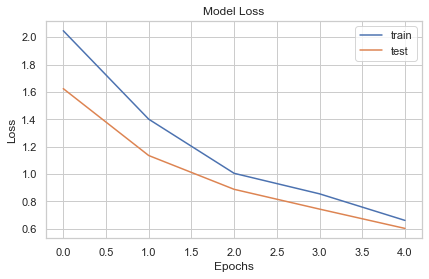

In [25]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

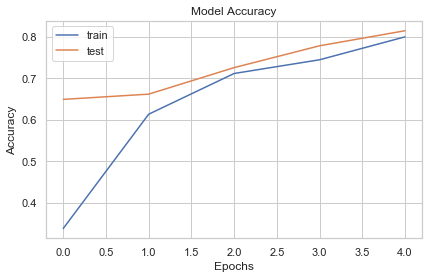

In [26]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Part F: Changing the Network Architecture

In [11]:
# Here we have changed the number of layers and the size of each layer

In [43]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [44]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)             0         
__________

In [46]:
batch_size=1000
epochs=5

In [47]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,  validation_split=0.2,callbacks=callbacks)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
12000/12000 [==============================] - ETA: 11:46 - loss: 2.3023 - acc: 0.10 - ETA: 8:34 - loss: 2.2677 - acc: 0.1425 - ETA: 7:05 - loss: 2.2107 - acc: 0.141 - ETA: 6:05 - loss: 2.1439 - acc: 0.172 - ETA: 5:08 - loss: 2.0612 - acc: 0.224 - ETA: 4:17 - loss: 1.9646 - acc: 0.280 - ETA: 3:30 - loss: 1.8735 - acc: 0.321 - ETA: 2:45 - loss: 1.7797 - acc: 0.364 - ETA: 2:04 - loss: 1.7179 - acc: 0.394 - ETA: 1:23 - loss: 1.6547 - acc: 0.418 - ETA: 41s - loss: 1.5949 - acc: 0.442 - 544s 45ms/step - loss: 1.5348 - acc: 0.4673 - val_loss: 0.9030 - val_acc: 0.7427

Epoch 00001: val_loss did not improve from 0.09838
Epoch 2/5
12000/12000 [==============================] - ETA: 6:54 - loss: 0.9125 - acc: 0.715 - ETA: 29:36 - loss: 0.7900 - acc: 0.76 - ETA: 19:36 - loss: 0.7507 - acc: 0.78 - ETA: 14:18 - loss: 0.7213 - acc: 0.79 - ETA: 11:04 - loss: 0.6917 - acc: 0.80 - ETA: 8:33 - loss: 0.6627 - acc: 0.8120 - ETA: 6:33 - loss: 0.629

In [48]:
score= model.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 43 - ETA: 42 - ETA: 42 - ETA: 41 - ETA: 41 - ETA: 40 - ETA: 40 - ETA: 40 - ETA: 39 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 24 - ETA:

In [49]:
print(score)

[0.012048102158820257, 0.9978]


In [12]:
# By changing the network architecture the model runs slower than the default model first initialized

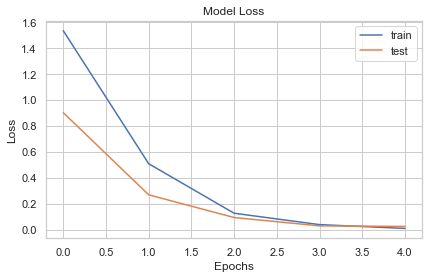

In [50]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

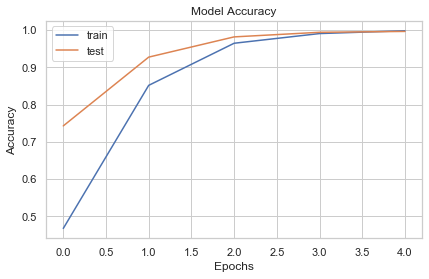

In [51]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Part C: Cost Function

In [6]:
# Changing the cost function = Kullback Leiber Divergence

In [27]:
model.compile(loss='kullback_leibler_divergence',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

In [28]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,  validation_split=0.2,callbacks=callbacks)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
12000/12000 [==============================] - ETA: 2:50 - loss: 0.5211 - acc: 0.855 - ETA: 2:38 - loss: 2.3306 - acc: 0.532 - ETA: 2:25 - loss: 2.0380 - acc: 0.583 - ETA: 2:08 - loss: 1.7015 - acc: 0.631 - ETA: 1:51 - loss: 1.4647 - acc: 0.677 - ETA: 1:36 - loss: 1.2944 - acc: 0.712 - ETA: 1:21 - loss: 1.1809 - acc: 0.733 - ETA: 1:07 - loss: 1.0894 - acc: 0.752 - ETA: 54s - loss: 1.0173 - acc: 0.767 - ETA: 36s - loss: 0.9589 - acc: 0.78 - ETA: 18s - loss: 0.9121 - acc: 0.78 - 256s 21ms/step - loss: 0.8788 - acc: 0.7942 - val_loss: 0.5718 - val_acc: 0.8330

Epoch 00001: val_loss improved from 0.60340 to 0.57176, saving model to ./base.model
Epoch 2/5
12000/12000 [==============================] - ETA: 3:46 - loss: 0.5196 - acc: 0.844 - ETA: 3:24 - loss: 0.5170 - acc: 0.846 - ETA: 3:06 - loss: 0.4985 - acc: 0.855 - ETA: 2:48 - loss: 0.4754 - acc: 0.863 - ETA: 2:25 - loss: 0.4760 - acc: 0.857 - ETA: 2:06 - loss: 0.4720 - acc: 0.8

In [29]:
score= model.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - ETA: 31 - ETA: 33 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 

In [30]:
print(score)

[0.28397931834459306, 0.9162]


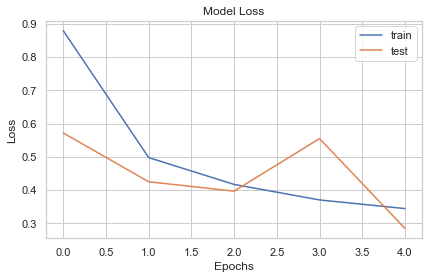

In [31]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

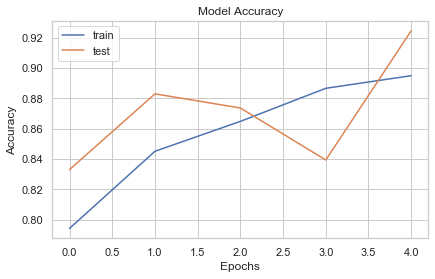

In [32]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [10]:
# By changing the cost function to Kullback Leiber Divergence the accuracy and time to run the model appears the same as compared to categorical cross entropy

## Part D: Changing the number of epochs

In [33]:
batch_size=1000
epochs=3

In [35]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 96)        83040     
__________

In [38]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2,callbacks=callbacks)

Train on 12000 samples, validate on 3000 samples
Epoch 1/3
12000/12000 [==============================] - ETA: 5:02 - loss: 2.3064 - acc: 0.062 - ETA: 3:37 - loss: 2.2883 - acc: 0.094 - ETA: 3:04 - loss: 2.2618 - acc: 0.127 - ETA: 2:34 - loss: 2.2029 - acc: 0.173 - ETA: 2:08 - loss: 2.1296 - acc: 0.223 - ETA: 1:46 - loss: 2.0595 - acc: 0.256 - ETA: 1:26 - loss: 2.0247 - acc: 0.267 - ETA: 1:08 - loss: 1.9788 - acc: 0.282 - ETA: 50s - loss: 1.9292 - acc: 0.304 - ETA: 33s - loss: 1.8798 - acc: 0.33 - ETA: 16s - loss: 1.8405 - acc: 0.36 - 221s 18ms/step - loss: 1.8034 - acc: 0.3822 - val_loss: 1.2435 - val_acc: 0.6307

Epoch 00001: val_loss did not improve from 0.28508
Epoch 2/3
12000/12000 [==============================] - ETA: 3:03 - loss: 1.2449 - acc: 0.657 - ETA: 2:54 - loss: 1.1578 - acc: 0.681 - ETA: 2:46 - loss: 1.0848 - acc: 0.700 - ETA: 2:32 - loss: 1.0344 - acc: 0.708 - ETA: 2:14 - loss: 0.9801 - acc: 0.720 - ETA: 1:54 - loss: 0.9328 - acc: 0.732 - ETA: 1:35 - loss: 0.8862 - ac

In [39]:
score= model.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 

In [8]:
# BY Reducing the epoches to 3 from 5 we get an Accuracy of approxmately 97% from 99%

In [40]:
print(score)

[0.07697497565411031, 0.9788]


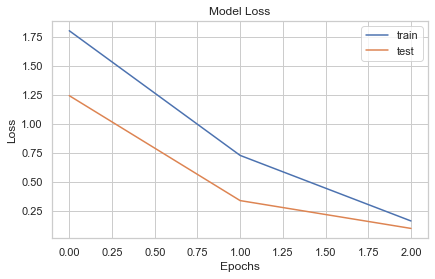

In [41]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

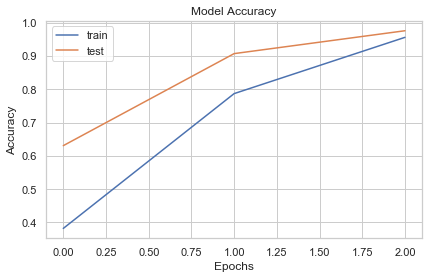

In [42]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Part G: Network Initialization
### Initializer = Random Normal

In [56]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1),kernel_initializer='random_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax",kernel_initializer='random_normal'))

In [57]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 150, 150, 32)      832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 18, 18, 96)        83040     
__________

In [60]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2,callbacks=callbacks)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
12000/12000 [==============================] - ETA: 13:24 - loss: 2.3015 - acc: 0.12 - ETA: 10:46 - loss: 2.2549 - acc: 0.16 - ETA: 8:39 - loss: 2.1955 - acc: 0.1787 - ETA: 7:12 - loss: 2.1664 - acc: 0.231 - ETA: 6:01 - loss: 2.1409 - acc: 0.266 - ETA: 5:00 - loss: 2.2034 - acc: 0.259 - ETA: 4:05 - loss: 2.1537 - acc: 0.275 - ETA: 3:14 - loss: 2.1263 - acc: 0.298 - ETA: 2:24 - loss: 2.1071 - acc: 0.313 - ETA: 1:35 - loss: 2.0874 - acc: 0.328 - ETA: 47s - loss: 2.0592 - acc: 0.346 - 616s 51ms/step - loss: 2.0323 - acc: 0.3633 - val_loss: 1.6897 - val_acc: 0.5890

Epoch 00001: val_loss did not improve from 0.02590
Epoch 2/5
12000/12000 [==============================] - ETA: 8:13 - loss: 1.7291 - acc: 0.546 - ETA: 7:30 - loss: 1.6668 - acc: 0.580 - ETA: 6:46 - loss: 1.5974 - acc: 0.619 - ETA: 6:00 - loss: 1.5297 - acc: 0.638 - ETA: 5:14 - loss: 1.4542 - acc: 0.650 - ETA: 4:31 - loss: 1.3811 - acc: 0.660 - ETA: 3:50 - loss: 1.3074

In [61]:
score= model.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 42 - ETA: 42 - ETA: 41 - ETA: 40 - ETA: 40 - ETA: 39 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA:

In [62]:
print(score)

[0.024107577953767032, 0.9964]


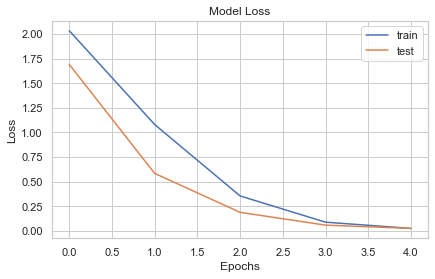

In [63]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

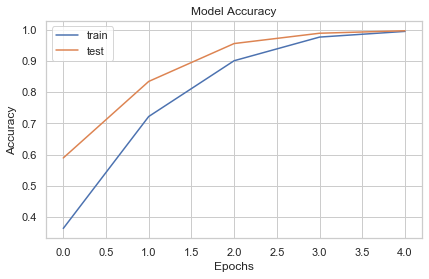

In [64]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Initializer : Lecum Uniform

In [68]:
keras.initializers.lecun_uniform(seed=None)
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1),kernel_initializer='lecun_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax",kernel_initializer='lecun_uniform'))

In [69]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [70]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2,callbacks=callbacks)

Train on 12000 samples, validate on 3000 samples
Epoch 1/5
12000/12000 [==============================] - ETA: 15:43 - loss: 2.3007 - acc: 0.10 - ETA: 12:33 - loss: 2.2479 - acc: 0.14 - ETA: 10:22 - loss: 2.1736 - acc: 0.20 - ETA: 9:02 - loss: 2.0908 - acc: 0.2338 - ETA: 7:23 - loss: 2.0137 - acc: 0.290 - ETA: 6:03 - loss: 1.9160 - acc: 0.329 - ETA: 4:53 - loss: 1.8385 - acc: 0.356 - ETA: 3:50 - loss: 1.7562 - acc: 0.388 - ETA: 2:48 - loss: 1.6865 - acc: 0.416 - ETA: 1:50 - loss: 1.6111 - acc: 0.446 - ETA: 54s - loss: 1.5375 - acc: 0.475 - 701s 58ms/step - loss: 1.4726 - acc: 0.5031 - val_loss: 0.5809 - val_acc: 0.8597

Epoch 00001: val_loss did not improve from 0.02494
Epoch 2/5
12000/12000 [==============================] - ETA: 8:36 - loss: 0.5830 - acc: 0.867 - ETA: 7:40 - loss: 0.5459 - acc: 0.856 - ETA: 6:56 - loss: 0.5128 - acc: 0.858 - ETA: 5:32 - loss: 0.4772 - acc: 0.866 - ETA: 4:15 - loss: 0.4365 - acc: 0.876 - ETA: 3:21 - loss: 0.4133 - acc: 0.884 - ETA: 2:37 - loss: 0.3820

In [71]:
score= model.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 42 - ETA: 42 - ETA: 41 - ETA: 41 - ETA: 40 - ETA: 40 - ETA: 39 - ETA: 39 - ETA: 38 - ETA: 38 - ETA: 37 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA:

In [72]:
print(score)

[0.002619514032127336, 0.9992]


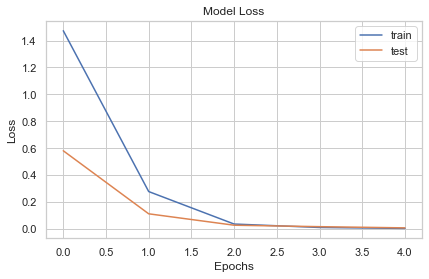

In [73]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

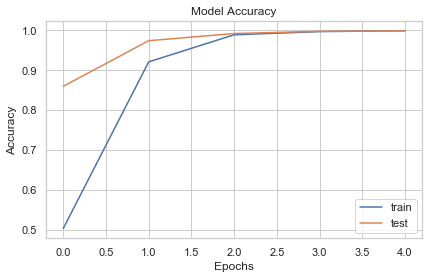

In [74]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [9]:
# Here I have implemented two initializers(Random Normal and Lecum Uniform) the accuracy seems to be the same. By implementuing Lecum Uniform initializer the model takes more time to run compared to Random Normal 

## Reference :
https://keras.io/initializers/a
https://www.youtube.com/watch?v=ArPaAX_PhIs&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF
https://www.youtube.com/watch?v=iaSUYvmCekI&t=219s


Copyright 2020 Ashutosh Raichurkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Conclusion: Hence, have implemented CNN using various HyperParameters to have an optimized model